In [63]:
import numpy as np
import pandas as pd

In [64]:
# Read the training & test data
train_data = pd.read_csv('risk_analytics_train.csv',index_col=0, header=0)
test_data = pd.read_csv('risk_analytics_test.csv',index_col=0, header=0)

In [65]:
print(train_data)

          Gender Married  Dependents     Education Self_Employed  \
Loan_ID                                                            
LP001002    Male      No         0.0      Graduate            No   
LP001003    Male     Yes         1.0      Graduate            No   
LP001005    Male     Yes         0.0      Graduate           Yes   
LP001006    Male     Yes         0.0  Not Graduate            No   
LP001008    Male      No         0.0      Graduate            No   
...          ...     ...         ...           ...           ...   
LP002978  Female      No         0.0      Graduate            No   
LP002979    Male     Yes         3.0      Graduate            No   
LP002983    Male     Yes         1.0      Graduate            No   
LP002984    Male     Yes         2.0      Graduate            No   
LP002990  Female      No         0.0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                              

In [66]:
print(test_data)

         Gender Married  Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001015   Male     Yes         0.0      Graduate            No   
LP001022   Male     Yes         1.0      Graduate            No   
LP001031   Male     Yes         2.0      Graduate            No   
LP001035   Male     Yes         2.0      Graduate            No   
LP001051   Male      No         0.0  Not Graduate            No   
...         ...     ...         ...           ...           ...   
LP002971   Male     Yes         3.0  Not Graduate           Yes   
LP002975   Male     Yes         0.0      Graduate            No   
LP002980   Male      No         0.0      Graduate            No   
LP002986   Male     Yes         0.0      Graduate            No   
LP002989   Male      No         0.0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [67]:
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


In [68]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [70]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [72]:
def Null_Value_Treatment(train_data):
    for i in train_data.columns:
        if train_data[i].dtypes == "int64" or train_data[i].dtypes == "float64":
            train_data[i].fillna(train_data[i].mean(),inplace=True)
        else:
            train_data[i].fillna(train_data[i].mode()[0],inplace=True)
    return train_data.isnull().sum()


In [73]:
"""Replacing numeric columns by mean to show the average value and replacing the character columns by mode to 
show the highest repeated value"""

'Replacing numeric columns by mean to show the average value and replacing the character columns by mode to \nshow the highest repeated value'

In [74]:
Null_Value_Treatment(train_data)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
def Null_Value_Treatment(test_data):
    for i in(test_data.columns):
        if test_data[i].dtypes == "int64" or test_data[i].dtypes == "float64":
            test_data[i].fillna(test_data[i].mean(),inplace=True)
        else:
            test_data[i].fillna(test_data[i].mode()[0],inplace=True)
    return test_data.isnull().sum()

In [76]:
Null_Value_Treatment(test_data)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [77]:
# Highlighting all the categorical columns
# Categorical columns have data in dtype object, and before implementing it on ML algorithm it is important that we 
# convert the object dtype into int (number) by label encoding them.

# label encoding basically assigns a number to a string. 
# Before moving on to Label encoding it is essential that we seperate the categorical columns first as shown below:

colname=[]
for i in train_data.columns:
    if train_data[i].dtypes== "object":
        colname.append(i)
colname

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [78]:
colname=[]
for i in test_data.columns:
    if test_data[i].dtypes== "object":
        colname.append(i)
colname

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [79]:
from sklearn. preprocessing import LabelEncoder
colname = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

le = LabelEncoder()

for x in colname:
    train_data[x]= le.fit_transform(train_data[x])

In [80]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [93]:
from sklearn.preprocessing import LabelEncoder
colname = ["Gender","Married","Education","Self_Employed","Property_Area"]

le = LabelEncoder()

for x in colname:
    test_data[x]= le.fit_transform(test_data[x])
    

In [94]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2,Eligible
1,LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2,Eligible
2,LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2,Eligible
3,LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,NaN,2,Eligible
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2,Eligible


In [82]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder  #importing LabelEncoder function from sklearn library 

le = LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])   #using LabelEncoder fn le and performing label encoding using fit transform
    
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_))) #makes a dictionary [key:value] to check the class 
    # and it's corresponding transformed mapping.
    
    print("Feature",x)
    print("mapping", le_name_mapping)

Feature Gender
mapping {0: 0, 1: 1}
Feature Married
mapping {0: 0, 1: 1}
Feature Education
mapping {0: 0, 1: 1}
Feature Self_Employed
mapping {0: 0, 1: 1}
Feature Property_Area
mapping {0: 0, 1: 1, 2: 2}


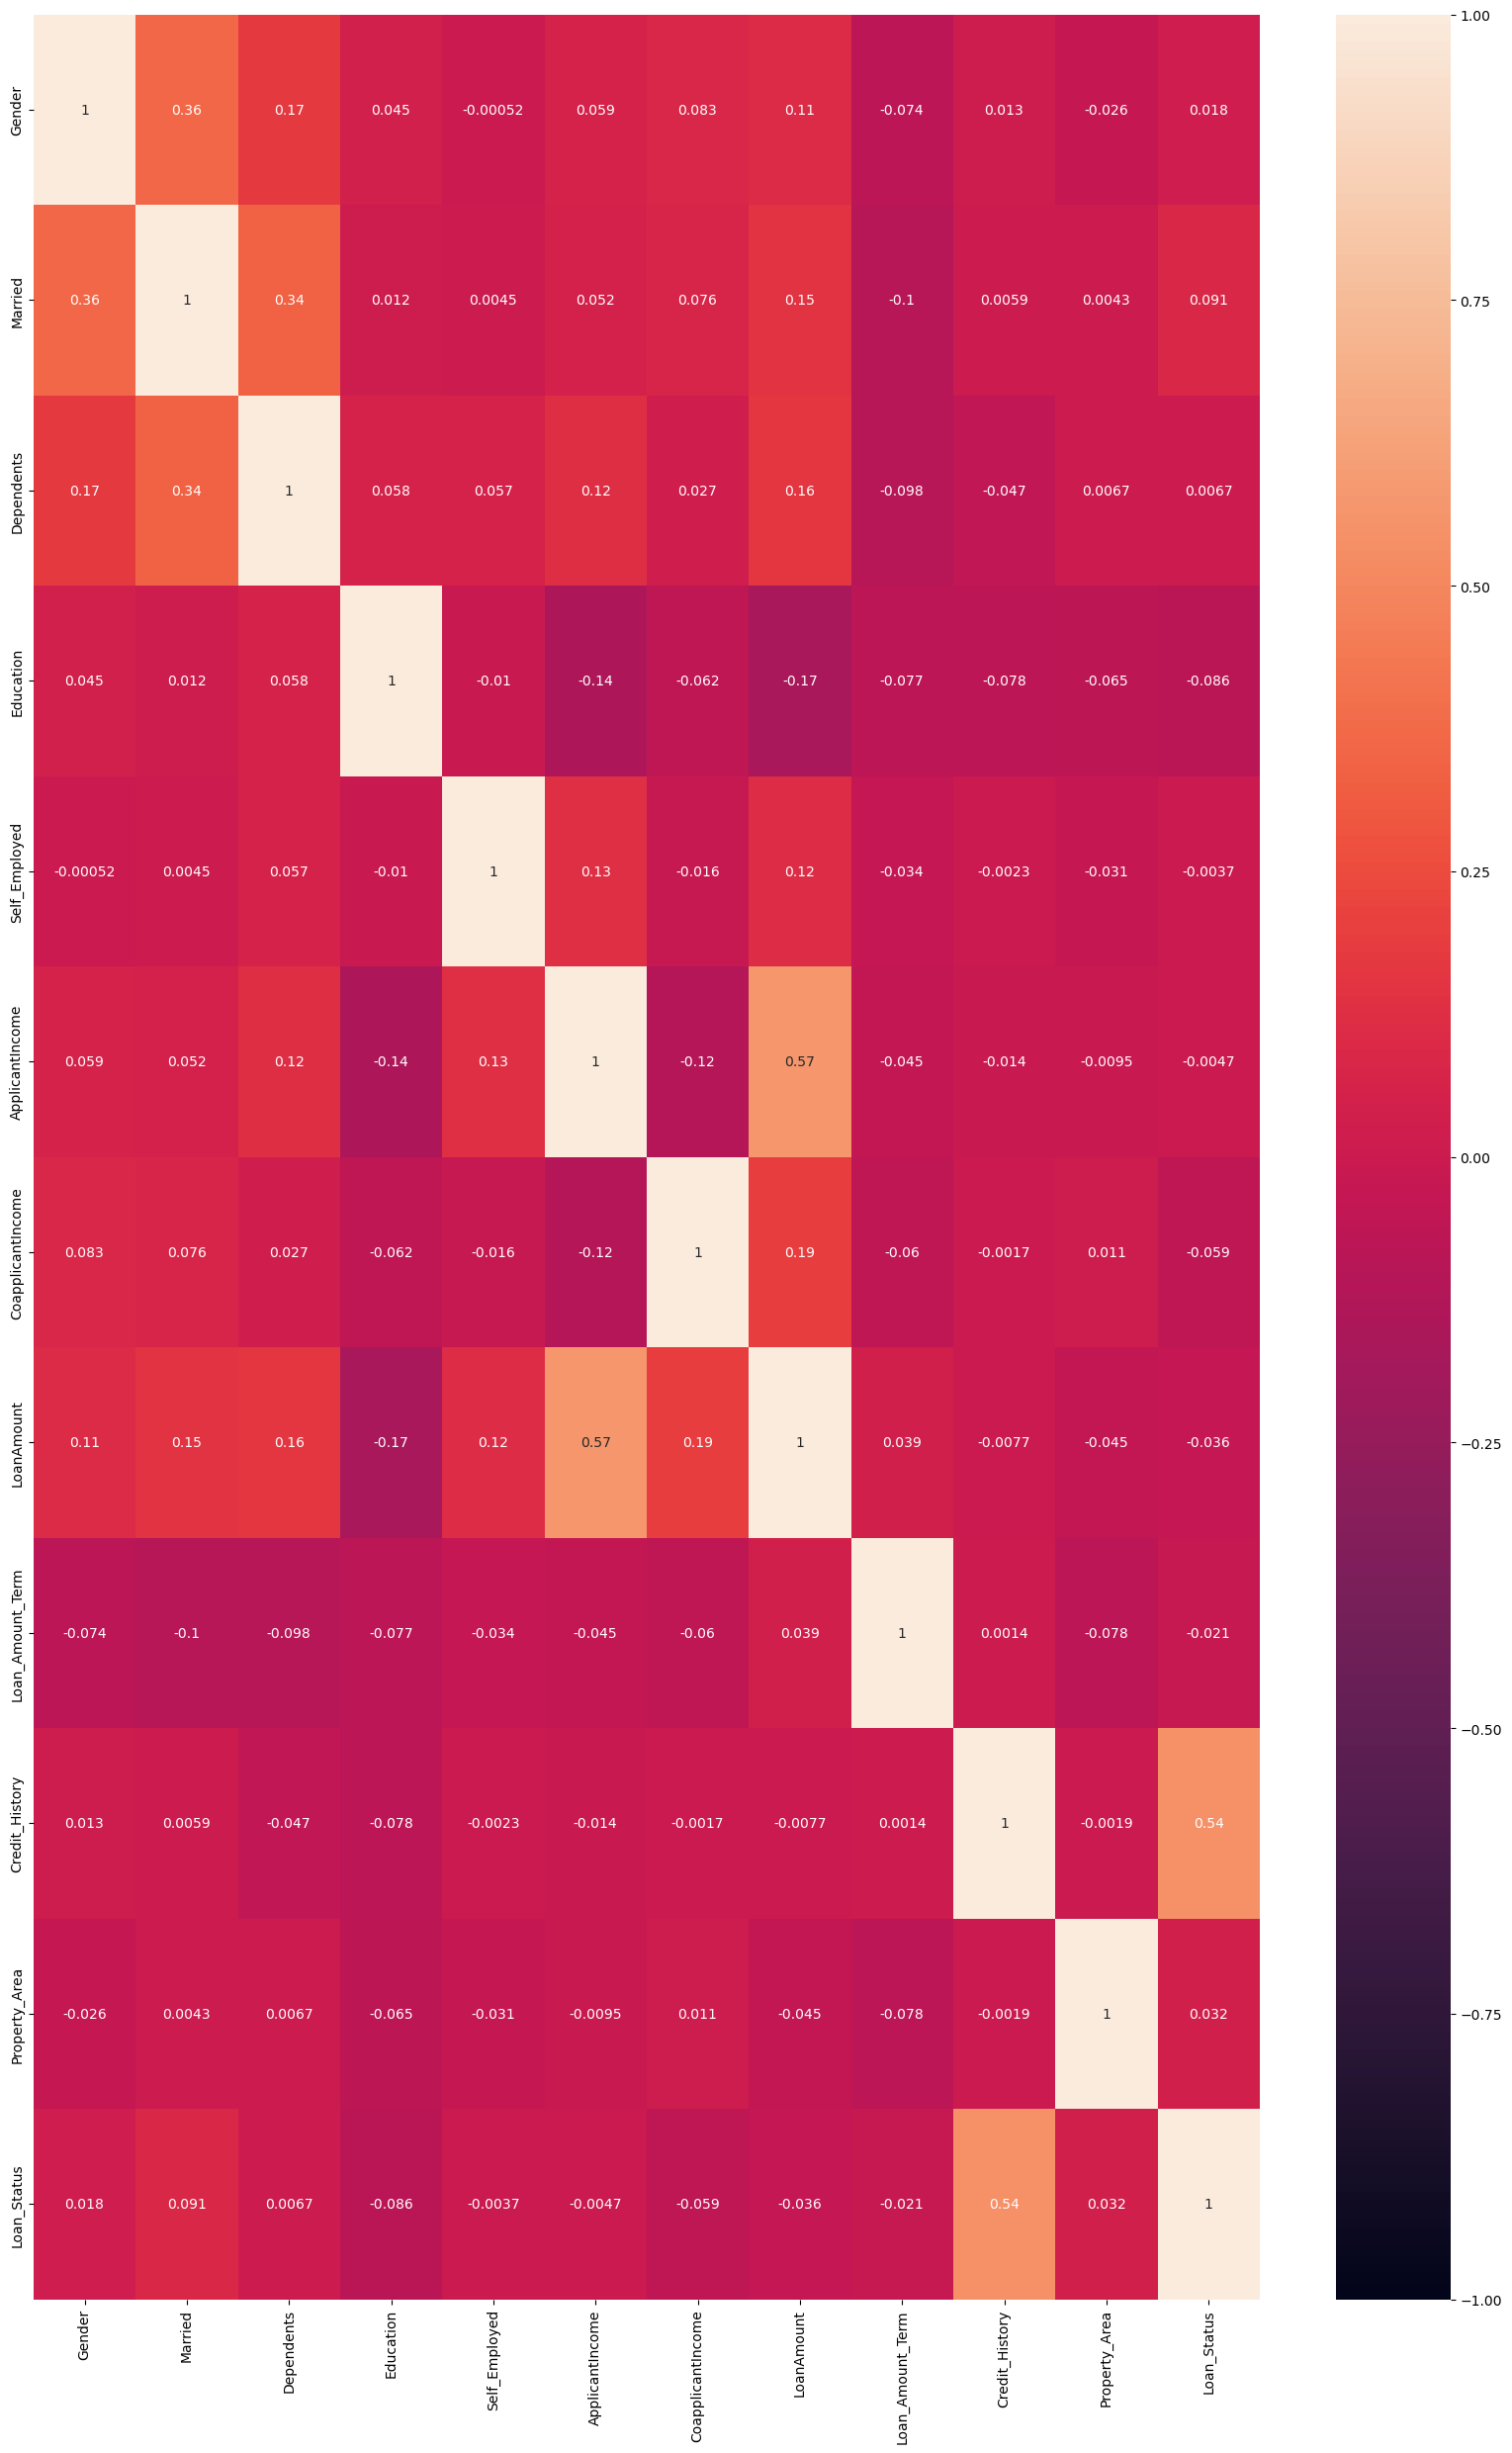

In [95]:
corr_df = train_data.corr()
corr_df

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

In [96]:
X_train = train_data.values[:,0:-1]
Y_train = train_data.values[:,-1]
Y_train = Y_train.astype(int)

In [97]:
X_train.shape

(614, 11)

In [108]:
Y_train.shape

(614,)

In [98]:
X_test = test_data.values[:,:]

In [99]:
X_test.shape

(367, 13)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'LP001015'

In [89]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf',C=20, gamma =0.01)
svc_model.fit(X_train,Y_train)
Y_pred = svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 

In [101]:
svc_model.score(X_train,Y_train)

0.8159609120521173

In [102]:
test_data= pd.read_csv(r'risk_analytics_test.csv')
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [103]:
test_data["Y_predictions"] = test_data["Y_predictions"].map({1:"Eligible",0:"Not Eligible"})

In [104]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


In [105]:
test_data.to_csv(r'test_data_output.csv',index= False)

In [106]:
test_data.Y_predictions.value_counts()

Y_predictions
Eligible        308
Not Eligible     59
Name: count, dtype: int64